# Text Classification

In [2]:
import numpy as np 
from sklearn.datasets import fetch_20newsgroups

## data set is a collection of news group email 

In [4]:
from sklearn.feature_extraction.text import CountVectorizer # DTM- which create sparse data
from sklearn.feature_extraction.text import TfidfTransformer #tfidf 
from sklearn.naive_bayes import MultinomialNB #naviebayes model 

In [5]:
fetch_20newsgroups

<function sklearn.datasets.twenty_newsgroups.fetch_20newsgroups(data_home=None, subset='train', categories=None, shuffle=True, random_state=42, remove=(), download_if_missing=True)>

In [13]:
#Defining categories in Target Variable
categories = ['rec.motorcycles','sci.electronics','comp.graphics','sci.med']

In [16]:
#Taking the train data 
train_data = fetch_20newsgroups(subset='train',categories=categories,shuffle=True, random_state=42)

In [17]:
print(train_data.target_names)

['comp.graphics', 'rec.motorcycles', 'sci.electronics', 'sci.med']


In [21]:
train_data

{'data': ['From: kreyling@lds.loral.com (Ed Kreyling 6966)\nSubject: Sun-os and 8bit ASCII graphics\nOrganization: Loral Data Systems\nDistribution: comp.graphics\nLines: 7\n\nI would like to know if anyone has had any luck using the upper 128 ASCII\ncharacters on a Sun station.  I am trying to convert a fortran program to run\non a Sun.  When we write character buffers to the Sun which contain char(218)\nor char(196) or char(197) etc.  We get characters on the screen but they are\nnot the characters in the standard ASCII tables.\n\nAny ideas or help will be appreciated.\n',
  "From: saz@hook.corp.mot.com (Scott Zabolotzky)\nSubject: .GIF to .BMP\nOrganization: Motorola, Inc.\nDistribution: usa\nNntp-Posting-Host: 129.188.122.160\nLines: 11\n\nI'm not sure if this is the correct place to ask this question.  If not,\nplease forgive me and point me in the right direction.\n\nDoes anybody know of a program that converts .GIF files to .BMP files\nand if so, where can I ftp it from?  Any he

In [20]:
train_data.data[0]

'From: kreyling@lds.loral.com (Ed Kreyling 6966)\nSubject: Sun-os and 8bit ASCII graphics\nOrganization: Loral Data Systems\nDistribution: comp.graphics\nLines: 7\n\nI would like to know if anyone has had any luck using the upper 128 ASCII\ncharacters on a Sun station.  I am trying to convert a fortran program to run\non a Sun.  When we write character buffers to the Sun which contain char(218)\nor char(196) or char(197) etc.  We get characters on the screen but they are\nnot the characters in the standard ASCII tables.\n\nAny ideas or help will be appreciated.\n'

In [22]:
train_data.data[0].split("\n")

['From: kreyling@lds.loral.com (Ed Kreyling 6966)',
 'Subject: Sun-os and 8bit ASCII graphics',
 'Organization: Loral Data Systems',
 'Distribution: comp.graphics',
 'Lines: 7',
 '',
 'I would like to know if anyone has had any luck using the upper 128 ASCII',
 'characters on a Sun station.  I am trying to convert a fortran program to run',
 'on a Sun.  When we write character buffers to the Sun which contain char(218)',
 'or char(196) or char(197) etc.  We get characters on the screen but they are',
 'not the characters in the standard ASCII tables.',
 '',
 'Any ideas or help will be appreciated.',
 '']

In [23]:
#"\n".join(train_data.data[0].split("\n")[:4])

'From: kreyling@lds.loral.com (Ed Kreyling 6966)\nSubject: Sun-os and 8bit ASCII graphics\nOrganization: Loral Data Systems\nDistribution: comp.graphics'

In [24]:
#print each email 
for t in train_data.data:
    print (t)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




From: schultz@hpcc01.corp.hp.com (David Schultz)
Subject: Re: Honda CB400F For Sale
Organization: the HP Corporate notes server
Lines: 5

I wanted to let people know that this motorcycle has been sold.

Thanks for your inquiries.

--Dave Schultz

From: egerter@gaul.csd.uwo.ca (Barry Egerter)
Subject: Where's DMORF?
Organization: Computer Science Dept., Univ. of Western Ontario, London, Canada
Distribution: usa
Keywords: DMORF
Nntp-Posting-Host: obelix.gaul.csd.uwo.ca
Lines: 26

	Could anyone direct me to the FTP site where I can find the DOS-based
morphing package called DMORF12.ZIP?  I had downloaded this file last week,
but the new DOS 6 crashed my hard drive and I lost it. Now I can't find the
site where I got it from.......

Also, are there any other morphing packages out for DOS (freeware or shareware)


Thanks in advance,
Barry

/---------------------------------------------------------------------------\
|       \\          //  _______   _______    egerter@obelix.gaul.csd.uwo.c

In [25]:
len(train_data.data)

2367

* There are 2367 emails in the train dataset

## DTM-- Document term matrix --frequnecy of words in a documnet 

In [28]:
count_vec =CountVectorizer()
x_train_counts = count_vec.fit_transform(train_data.data)

In [29]:
x_train_counts

<2367x35653 sparse matrix of type '<class 'numpy.int64'>'
	with 326244 stored elements in Compressed Sparse Row format>

In [31]:
x_train_counts.data

array([1, 2, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
#DTM
import pandas as pd
x1=pd.DataFrame(x_train_counts.toarray())
x1.head()

,0,1,2,3,4,5,6,7,8,9,...,35643,35644,35645,35646,35647,35648,35649,35650,35651,35652
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF 

In [37]:
tfidf_trans = TfidfTransformer()

In [38]:
x_train_tfidf = tfidf_trans.fit_transform(x_train_counts)

In [41]:
x2 = pd.DataFrame(x_train_tfidf.toarray())
x2.head()

,0,1,2,3,4,5,6,7,8,9,...,35643,35644,35645,35646,35647,35648,35649,35650,35651,35652
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model 

In [44]:
nb = MultinomialNB()

In [45]:
mod_naive = nb.fit(x_train_tfidf,train_data.target)

In [46]:
mod_naive.score

<bound method ClassifierMixin.score of MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)>

In [47]:
new_item=["I have a motorbike yamaha and harley","i have a GPU based system"]

In [48]:
x_new_count = count_vec.transform(new_item)

In [49]:
x_new_tfidf = tfidf_trans.transform(x_new_count)

In [50]:
predicted = mod_naive.predict(x_new_tfidf)

In [51]:
predicted

array([1, 0], dtype=int64)

In [52]:
train_data.target_names

['comp.graphics', 'rec.motorcycles', 'sci.electronics', 'sci.med']

In [54]:
for a,b in zip(new_item,predicted):
    print ("This is " ,a)
    print ("This is " ,train_data.target_names[b])

This is  I have a motorbike yamaha and harley
This is  rec.motorcycles
This is  i have a GPU based system
This is  comp.graphics


# word cloud 

In [56]:
import wordcloud

In [57]:
text = "India (Hindi: Bhārat), officially the Republic of India (Hindi: Bhārat Gaṇarājya),[23] is a country in South Asia. It is the second-most populous country, the seventh-largest country by land area, and the most populous democracy in the world. Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land borders with Pakistan to the west;[f] China, Nepal, and Bhutan to the north; and Bangladesh and Myanmar to the east. In the Indian Ocean, India is in the vicinity of Sri Lanka and the Maldives; its Andaman and Nicobar Islands share a maritime border with Thailand and Indonesia.Modern humans arrived on the Indian subcontinent from Africa no later than 55,000 years ago.[24] Their long occupation, initially in varying forms of isolation as hunter-gatherers, has made the region highly diverse, second only to Africa in human "

In [58]:
text

'India (Hindi: Bhārat), officially the Republic of India (Hindi: Bhārat Gaṇarājya),[23] is a country in South Asia. It is the second-most populous country, the seventh-largest country by land area, and the most populous democracy in the world. Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land borders with Pakistan to the west;[f] China, Nepal, and Bhutan to the north; and Bangladesh and Myanmar to the east. In the Indian Ocean, India is in the vicinity of Sri Lanka and the Maldives; its Andaman and Nicobar Islands share a maritime border with Thailand and Indonesia.Modern humans arrived on the Indian subcontinent from Africa no later than 55,000 years ago.[24] Their long occupation, initially in varying forms of isolation as hunter-gatherers, has made the region highly diverse, second only to Africa in human '

In [59]:
import nltk 
from nltk.corpus import stopwords

In [60]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [61]:
import matplotlib.pyplot as plt 

In [62]:
def wordcl(abc):
    plt.figure(figsize=(10,10))
    plt.imshow(abc)
    plt.axis=("off")

In [68]:
from wordcloud import WordCloud

In [69]:
wordcloud = WordCloud(width=300,height=300).generate(text)

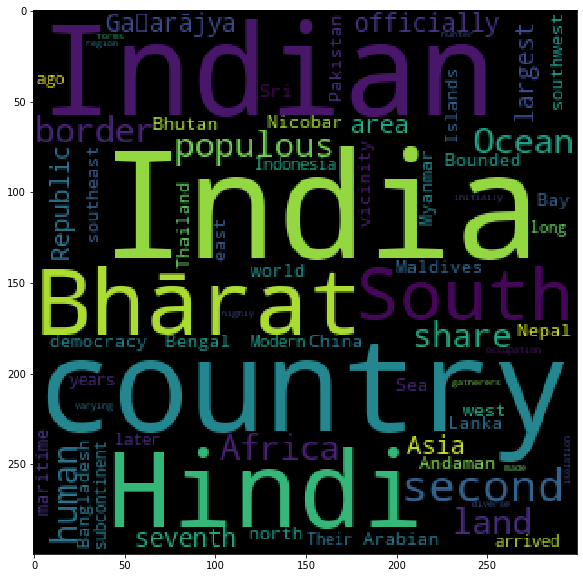

In [70]:
wordcl(wordcloud)

In [71]:
wordcloud

In [72]:
stopwords = set(stopwords.words('english'))

In [73]:
from nltk.tokenize import word_tokenize

In [74]:
word_tokens = word_tokenize(text)

In [75]:
word_tokens

['India',
 '(',
 'Hindi',
 ':',
 'Bhārat',
 ')',
 ',',
 'officially',
 'the',
 'Republic',
 'of',
 'India',
 '(',
 'Hindi',
 ':',
 'Bhārat',
 'Gaṇarājya',
 ')',
 ',',
 '[',
 '23',
 ']',
 'is',
 'a',
 'country',
 'in',
 'South',
 'Asia',
 '.',
 'It',
 'is',
 'the',
 'second-most',
 'populous',
 'country',
 ',',
 'the',
 'seventh-largest',
 'country',
 'by',
 'land',
 'area',
 ',',
 'and',
 'the',
 'most',
 'populous',
 'democracy',
 'in',
 'the',
 'world',
 '.',
 'Bounded',
 'by',
 'the',
 'Indian',
 'Ocean',
 'on',
 'the',
 'south',
 ',',
 'the',
 'Arabian',
 'Sea',
 'on',
 'the',
 'southwest',
 ',',
 'and',
 'the',
 'Bay',
 'of',
 'Bengal',
 'on',
 'the',
 'southeast',
 ',',
 'it',
 'shares',
 'land',
 'borders',
 'with',
 'Pakistan',
 'to',
 'the',
 'west',
 ';',
 '[',
 'f',
 ']',
 'China',
 ',',
 'Nepal',
 ',',
 'and',
 'Bhutan',
 'to',
 'the',
 'north',
 ';',
 'and',
 'Bangladesh',
 'and',
 'Myanmar',
 'to',
 'the',
 'east',
 '.',
 'In',
 'the',
 'Indian',
 'Ocean',
 ',',
 'India',

In [76]:
filtered_sentences = [a for a in word_tokens if not a in stopwords]

In [77]:
filtered_sentences

['India',
 '(',
 'Hindi',
 ':',
 'Bhārat',
 ')',
 ',',
 'officially',
 'Republic',
 'India',
 '(',
 'Hindi',
 ':',
 'Bhārat',
 'Gaṇarājya',
 ')',
 ',',
 '[',
 '23',
 ']',
 'country',
 'South',
 'Asia',
 '.',
 'It',
 'second-most',
 'populous',
 'country',
 ',',
 'seventh-largest',
 'country',
 'land',
 'area',
 ',',
 'populous',
 'democracy',
 'world',
 '.',
 'Bounded',
 'Indian',
 'Ocean',
 'south',
 ',',
 'Arabian',
 'Sea',
 'southwest',
 ',',
 'Bay',
 'Bengal',
 'southeast',
 ',',
 'shares',
 'land',
 'borders',
 'Pakistan',
 'west',
 ';',
 '[',
 'f',
 ']',
 'China',
 ',',
 'Nepal',
 ',',
 'Bhutan',
 'north',
 ';',
 'Bangladesh',
 'Myanmar',
 'east',
 '.',
 'In',
 'Indian',
 'Ocean',
 ',',
 'India',
 'vicinity',
 'Sri',
 'Lanka',
 'Maldives',
 ';',
 'Andaman',
 'Nicobar',
 'Islands',
 'share',
 'maritime',
 'border',
 'Thailand',
 'Indonesia.Modern',
 'humans',
 'arrived',
 'Indian',
 'subcontinent',
 'Africa',
 'later',
 '55,000',
 'years',
 'ago',
 '.',
 '[',
 '24',
 ']',
 'Their'

In [78]:
def ltos(s):
    str1=" "
    return(str1.join(s))

In [79]:
fs = ltos(filtered_sentences)

In [80]:
fs

'India ( Hindi : Bhārat ) , officially Republic India ( Hindi : Bhārat Gaṇarājya ) , [ 23 ] country South Asia . It second-most populous country , seventh-largest country land area , populous democracy world . Bounded Indian Ocean south , Arabian Sea southwest , Bay Bengal southeast , shares land borders Pakistan west ; [ f ] China , Nepal , Bhutan north ; Bangladesh Myanmar east . In Indian Ocean , India vicinity Sri Lanka Maldives ; Andaman Nicobar Islands share maritime border Thailand Indonesia.Modern humans arrived Indian subcontinent Africa later 55,000 years ago . [ 24 ] Their long occupation , initially varying forms isolation hunter-gatherers , made region highly diverse , second Africa human'

In [81]:
wordcloud = WordCloud(width=300,height=300).generate(fs)

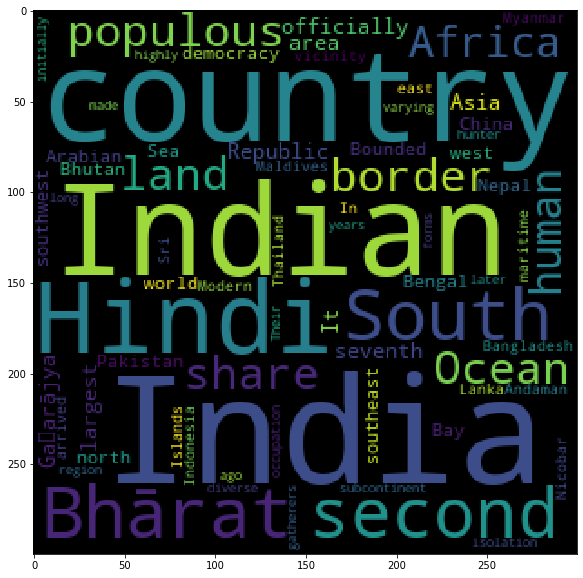

In [82]:
wordcl(wordcloud)

# Sentiment Analysis
* polarity score : [-1 to +1] -- -1 means purely negative and +1 means purely positive sentiment.
* Subjective score : [0 to 1] -- used to tell wether the sentence is subjective or objective.0 - objective ,1-subjective.

In [83]:
!pip install textblob

In [84]:
from textblob import TextBlob

In [86]:
sent = " Hi ! i am good , you made me happy"

In [87]:
outcome = TextBlob(sent).sentiment

In [88]:
print(outcome)

Sentiment(polarity=0.75, subjectivity=0.8)
